In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

!ls

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
spark = SparkSession.builder\
                    .master("local")\
                    .appName("word count")\
                    .config("spark.executor.heartbeatInterval", "3600s")\
                    .config("spark.network.timeout", "10000s")\
                    .getOrCreate()
sc = spark.sparkContext

In [3]:
sc=spark.sparkContext


In [4]:
text = sc.textFile('/KahmirAlzazira.txt,'+'/KashmirConversation.txt,'+'/KashmirDawn.txt,'+'/KashmirDwantimes.txt,'+'/KashmirGuardian.txt,'+'/KashmirTheowner.txt,'+'/KashmirTrt.txt,'+'/Kashmirnytimes.txt,'+'/kashmirEco.txt,'+'/kashmirFirstPost.txt')
#text2 = sc.textFile()

In [5]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [7]:
text_cleaned = text.map(lower_clean_str)


In [8]:
text_count = text_cleaned.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))\
                .reduceByKey(lambda x, y: x+y)

In [9]:
df = text_count.toDF()
df1 = df.toPandas()

In [12]:
df1 = df1.rename(columns={'_1':'word', '_2':'count'})
prepositions = ['the', 'and', 'a', 'an', 'of', 'to', 'in', 'that', 'have', 'at', 'it', 'as', 'for', 'was', 'is', \
                'be', 'are', 'from', 'by', 'on', 'or', '', '–', 'were', 'with', 'their', 'some', 'her', 'more', \
                'but', 'this', 'there', 'said', 'has', 'had', 'not', 'its','he','his','been','who','they','which']
df1 = df1[~df1['word'].isin(prepositions)]
df_final = df1.sort_values('count', ascending=False).head(10)
df_final

,word,count
164,kashmir,66
1100,india,27
1396,police,21
1090,pakistan,18
1095,international,16
7,minister,15
1432,shah,14
1410,indian,14
1342,pandits,14
25,law,14


In [13]:
df1.count()

word     1504
count    1504
dtype: int64

In [14]:
import glob

read_files = glob.glob("/KashmirDwantimes.txt")

with open("result.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

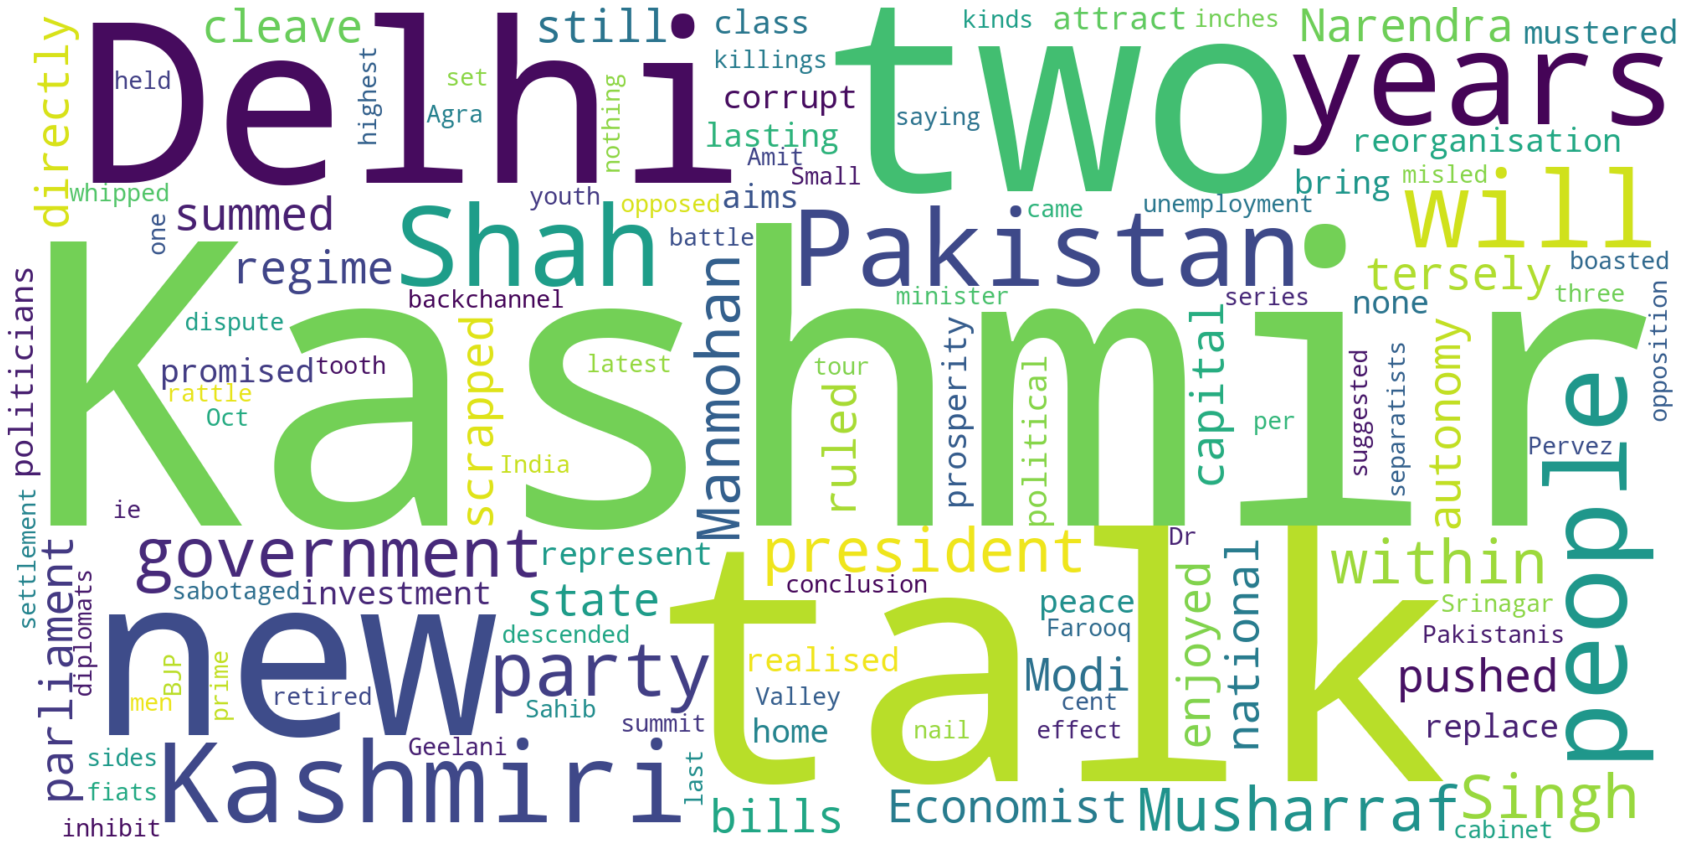

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Load text file
data = open("/KashmirDwantimes.txt", encoding="utf8").read()

# Create image
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, collocations=False, background_color="white", stopwords = STOPWORDS).generate(data)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()